Dataset shape: (13580, 21)
Cleaned dataset shape: (6858, 7)
📊 Model Performance:
Mean Absolute Error: 300174.10129338177
R² Score: 0.5415800984411975


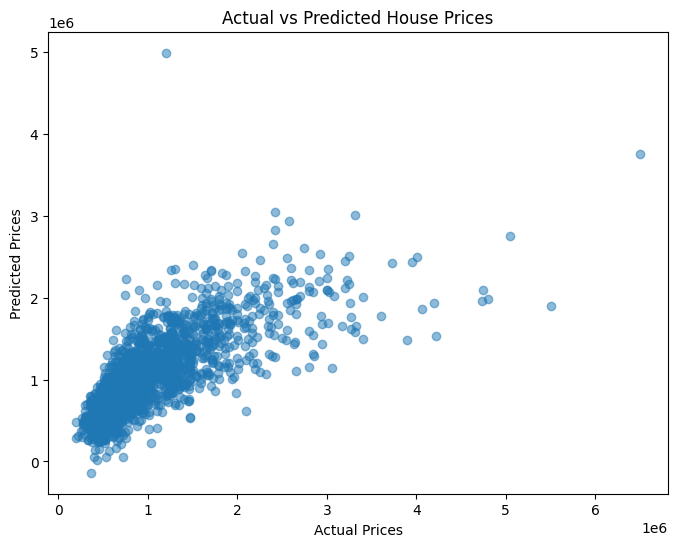

In [16]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load dataset
melbourne = pd.read_csv("melb_data.csv")
print("Dataset shape:", melbourne.shape)

# Step 3: Choose features that exist in dataset
melbourne_features = ["Rooms", "Distance", "Bathroom", "Landsize", "BuildingArea", "YearBuilt", "Propertycount"]
X = melbourne[melbourne_features]
y = melbourne.Price

# Step 4: Drop missing values
data = pd.concat([X, y], axis=1).dropna()
X = data[melbourne_features]
y = data.Price

print("Cleaned dataset shape:", X.shape)

# Step 5: Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("📊 Model Performance:")
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

# Step 9: Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


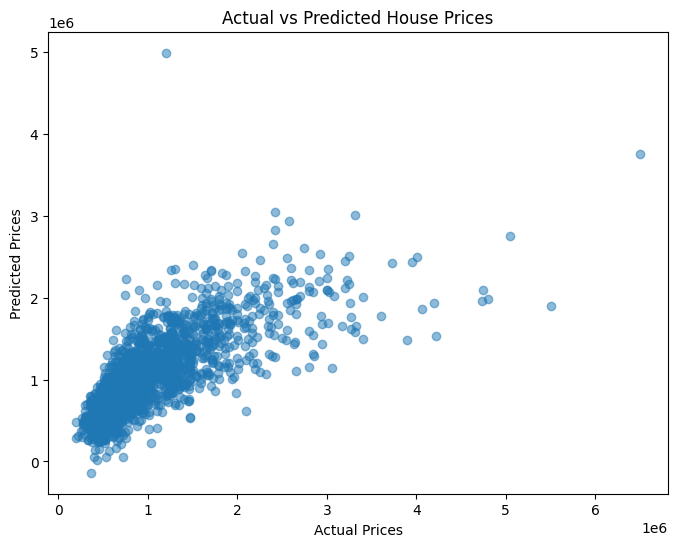

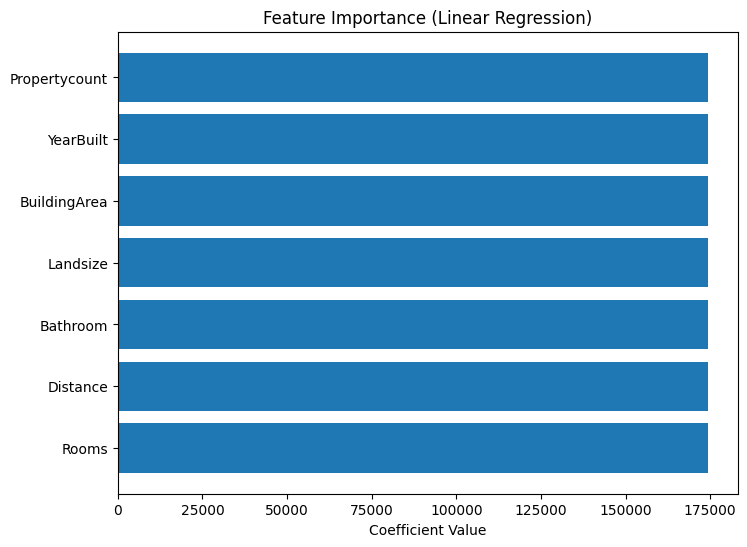

In [17]:
# 📊 1. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# 📊 2. Feature Importance (from coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.show()


In [19]:
sample_house = pd.DataFrame({
    "Rooms": [3],
    "Distance": [10],
    "Bathroom": [2],
    "Landsize": [300],
    "BuildingArea": [120],
    "YearBuilt": [2000],       # must include because model trained with it
    "Propertycount": [5000]    # must include because model trained with it
})

# Predict the price
predicted_price = model.predict(sample_house)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $967,178.71


In [20]:
import joblib

# Save the model
joblib.dump(model, "house_price_model.pkl")

# Later load it back like this:
# model = joblib.load("house_price_model.pkl")


['house_price_model.pkl']

In [23]:
import joblib

# Save trained model
joblib.dump(model, "melbourne_model.pkl")

# Save feature names
joblib.dump(X.columns.tolist(), "features.pkl")


['features.pkl']